# Predict Customer Clicked Ads Classification By Using Machine Learning

Name : Azarya Yehezkiel Pinondang Sipahutar

**Project Overview**:
A company in Indonesia wants to know the effectiveness of their advertisements. It is essential for companies operating in the digital marketing consultant sector to find out how successful the advertisements they are marketing are so that they can attract customers to see the advertisements. In this mini project, I am responsible for looking for insights regarding user behaviour from this data by creating visualizations, creating machine learning relevant to the company's needs, and making recommendations from the findings obtained.

**Project Goals**<br>
Knowing the effectiveness of the advertisements displayed and the success of the advertisements being marketed allows them to optimize the way the company advertises on the internet and attract customers to see the advertisements.<br><br>

**Objective** <br> 
1. Find insights.

2. Clean data

3. Develop models.

4. Make business recommendations: 


## Task 1 - Customer Type And Behaviour Analysis On Advertisement
**Task Goals** :<br> Understand the characteristics and behaviors of customers in relation to advertisements.<br><br>

**Task Objective** :<br> 
- EDA (Exploratory Data Analysis) to find insights from the data.
- Univariate analysis to find insights from the data.
- Bivariate analysis to find insights from the data.
- Multivariate analysis to find insights from the data.
- Create visualizations to support the insights.

### Import Library

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset & Premilinary Data Checking

In [2]:
df = pd.read_csv('./data/Clicked Ads Dataset.csv')
display(df.sample(4))

# Displat the infromation about the DataFrame
print("DataFrame Information:")
df.info()

# Create a DataFrame for the description
desc_df = df.describe(include='all').T

# Add the number of unique values to the description DataFrame
desc_df['unique'] = df.nunique()

# Display the description DaataFrame
print('\nDataFrame Description')
display(desc_df)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
88,88,57.70,34,298876690.0,109.07,Perempuan,3/14/2016 23:13,Yes,Medan,Sumatra Utara,Bank
789,789,40.88,33,339881150.0,136.18,Laki-Laki,5/31/2016 17:50,Yes,Bandung,Jawa Barat,Fashion
931,931,61.76,34,234877300.0,114.69,Perempuan,5/27/2016 8:53,Yes,Bekasi,Jawa Barat,Electronic
946,946,72.82,34,530388740.0,191.82,Laki-Laki,1/27/2016 16:06,No,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,Food


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB

DataFrame Description


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,1000,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Daily Time Spent on Site,987.0,890,NaN,NaN,64.929524,15.844699,32.6,51.27,68.11,78.46,91.43
Age,1000.0,43,NaN,NaN,36.009,8.785562,19.0,29.0,35.0,42.0,61.0
Area Income,987.0,987,NaN,NaN,384864670.638298,94079989.569259,97975500.0,328632990.0,399068320.0,458355450.0,556393600.0
Daily Internet Usage,989.0,955,NaN,NaN,179.86362,43.870142,104.78,138.71,182.65,218.79,267.01
Male,997,2,Perempuan,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Timestamp,1000,997,5/26/2016 15:40,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Clicked on Ad,1000,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,1000,30,Surabaya,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
province,1000,16,Daerah Khusus Ibukota Jakarta,253,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Upon the initial analysis of the data, I found :
- The data has 11 columns and 1000 rows.
- The data has 3 data types, which are int64, float64, and object.
- `Unnamed: 0` is an index column.(I will drop this column)
- `Male` column should be changed to `Gender` column.
- and other column names should be changed for name consistency.
- `Age` minimum Age is 19 and maximum Age is 61 (this information will be helpfull for binning the Age column later).|

In [3]:
# Create a copy of the DataFrame to not modify the original DataFrame
dfe = df.copy()

# column rename
col_rename = {'Daily Time Spent on Site': 'daily_time_spent_on_site',
              'Age' : 'age',
              'Area Income': 'area_income',
              'Daily Internet Usage': 'daily_internet_usage',
              'Male':'gender',
              'Timestamp':'timestamp',
              'Clicked on Ad':'clicked_on_ad',
              'category' : 'ad_category'
}
dfe.rename(columns=col_rename, inplace=True)

### Metadata
Column Name | Description
--- | ---
`daily_time_spent_on_site` | This is a numerical field that represents the amount of time a customer spends on the site daily. It's measured in minutes. 
`age` | This is a numerical field that represents the age of the customer.
`area_income` | This is a numerical field that represents the income of the area where the user lives. It's measured in Indonesian Rupiah.
`daily_internet_usage` | This is a numerical field that represents the amount of time a user spends on the internet daily. It's measured in minutes.
`gender` | This is a categorical field that represents the gender of the user. It's in Indonesian, with "Perempuan" meaning female and "Laki-Laki" meaning male.
`timestamp` | This is a datetime field that represents when the user clicked on the ad. It's in the format of month/day/year hour:minute.
`clicked_on_ad` | This is a categorical field that represents whether the user clicked on the ad. "No" means the user did not click on the ad.
`city` | This is a categorical field that represents the city where the user lives.
`province` | This is a categorical field that represents the province where the user lives.
`ad_category` | This is a categorical field that represents the category of the ad.

### Missing Values and Duplicate

In [4]:
missing_data = dfe.isna().sum()
missing = missing_data[missing_data > 0]


missing_percentage = (dfe.isna().sum() / len(dfe)) * 100
percentage = missing_percentage[missing_percentage > 0]
percentage = percentage.map('{:.2f}%'.format)

print('Missing Data:')
display(missing)
print('\nMissing Data Percentage:')
display(percentage)

Missing Data:


daily_time_spent_on_site    13
area_income                 13
daily_internet_usage        11
gender                       3
dtype: int64


Missing Data Percentage:


daily_time_spent_on_site    1.30%
area_income                 1.30%
daily_internet_usage        1.10%
gender                      0.30%
dtype: object

Missing values on this dataset is under 5% so i will decide after EDA process.

In [5]:
dfe.duplicated().sum()

0

the dataset has 0 duplicate rows.

### Feature Engineering

In [6]:
dfe.sample(10)

,Unnamed: 0,daily_time_spent_on_site,age,area_income,daily_internet_usage,gender,timestamp,clicked_on_ad,city,province,ad_category
140,140,83.86,31,448856520.0,190.25,Perempuan,2/5/2016 19:06,No,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,Bank
186,186,46.31,57,309739640.0,153.98,Laki-Laki,3/24/2016 13:37,Yes,Batam,Kepulauan Riau,House
209,209,40.15,38,271217030.0,134.88,Laki-Laki,6/27/2016 18:37,Yes,Jakarta Timur,Daerah Khusus Ibukota Jakarta,House
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
757,757,48.86,35,437245900.0,128.37,Laki-Laki,1/4/2016 0:44,Yes,Bekasi,Jawa Barat,Food
545,545,42.60,55,385851550.0,168.29,Perempuan,7/11/2016 18:12,Yes,Surabaya,Jawa Timur,House
512,512,84.53,33,433454420.0,215.18,Laki-Laki,7/11/2016 9:32,No,Balikpapan,Kalimantan Timur,House
587,587,43.83,45,249793740.0,129.01,Perempuan,1/29/2016 5:39,Yes,Tasikmalaya,Jawa Barat,Finance
895,895,80.99,26,248653160.0,207.53,Laki-Laki,6/10/2016 3:56,No,Bekasi,Jawa Barat,Finance
437,437,76.24,27,447835080.0,214.42,Perempuan,6/7/2016 1:29,No,Depok,Jawa Barat,Fashion


[Age Grouping Binning Preferences](https://www.quanthub.com/power-bi-group-and-bin-data/#:~:text=Binning%20is%20a%20technique%20used,to%20analyze%20trends%20more%20effectively).

In [7]:
# Age Group
age_group = [
    (dfe['age'] >= 51),
    (dfe['age'] >= 36) & (dfe['age'] < 51),
    (dfe['age'] >= 19) & (dfe['age'] < 36)
]
age_binning = ['Old Adults', 'Middle Adults', 'Young Adults']
dfe['age_group'] = np.select(age_group, age_binning)

# Extract timestamp for new features
dfe['timestamp'] = pd.to_datetime(dfe['timestamp'])
dfe['month_ad_clicked'] = dfe['timestamp'].dt.month.astype('int64')
dfe['day_ad_clicked'] = dfe['timestamp'].dt.day.astype('int')
dfe['hour_ad_clicked'] = dfe['timestamp'].dt.hour.astype('int')
dfe['minute_ad_clicked'] = dfe['timestamp'].dt.minute.astype('int')

# 
dfe['total_online_time'] = dfe['daily_time_spent_on_site'] + dfe['daily_internet_usage']


def map_province(province):
    province_mapping = {
        'Daerah Khusus Ibukota Jakarta': 'DKI Jakarta',
        'Jawa Timur': 'Jawa',
        'Jawa Barat': 'Jawa',
        'Jawa Tengah': 'Jawa',
        'Kepulauan Riau': 'Sumatra',
        'Sumatra Utara': 'Sumatra',
        'Sumatra Selatan': 'Sumatra',
        'Sumatra Barat': 'Sumatra',
        'Riau': 'Kepulauan Riau',
        'Kepulauan Riau': 'Kepulauan Riau',
        'Kalimantan Timur': 'Kalimantan',
        'Kalimantan Selatan': 'Kalimantan',
        'Kalimantan Tengah': 'Kalimantan',
        'Kalimantan Barat': 'Kalimantan',
    }
    return province_mapping.get(province, province)

dfe['province'] = dfe['province'].apply(map_province)

### EDA

### Univariate Analysis

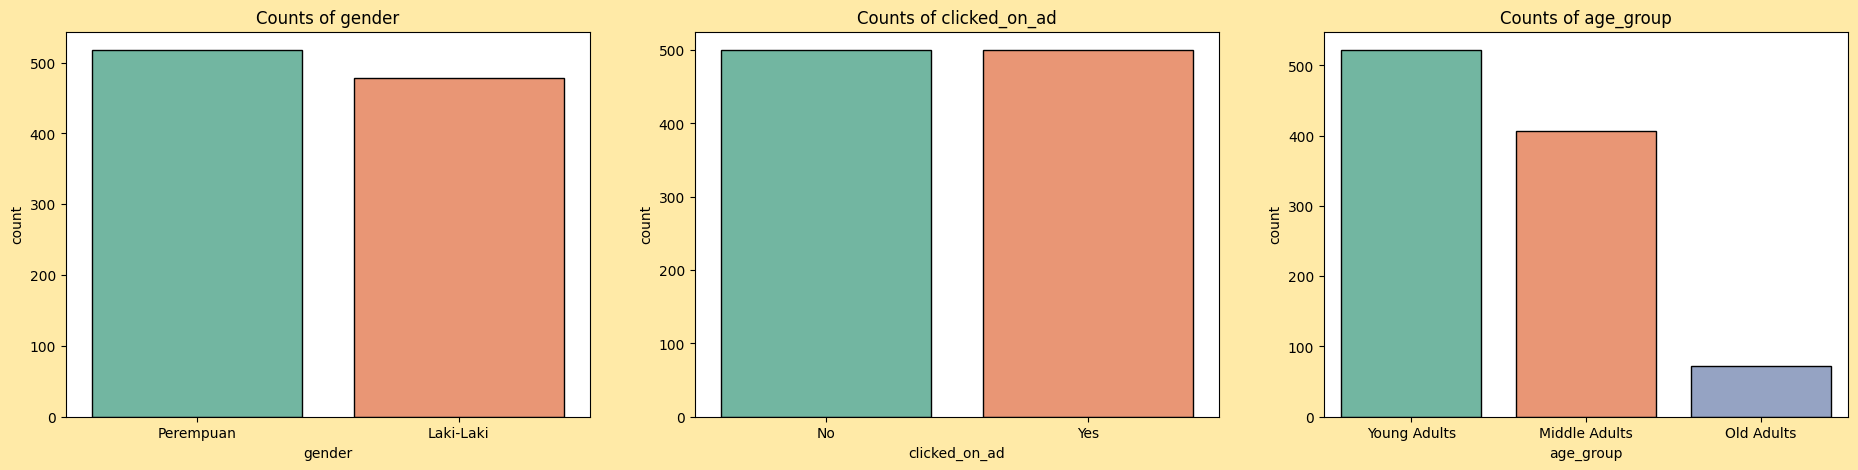

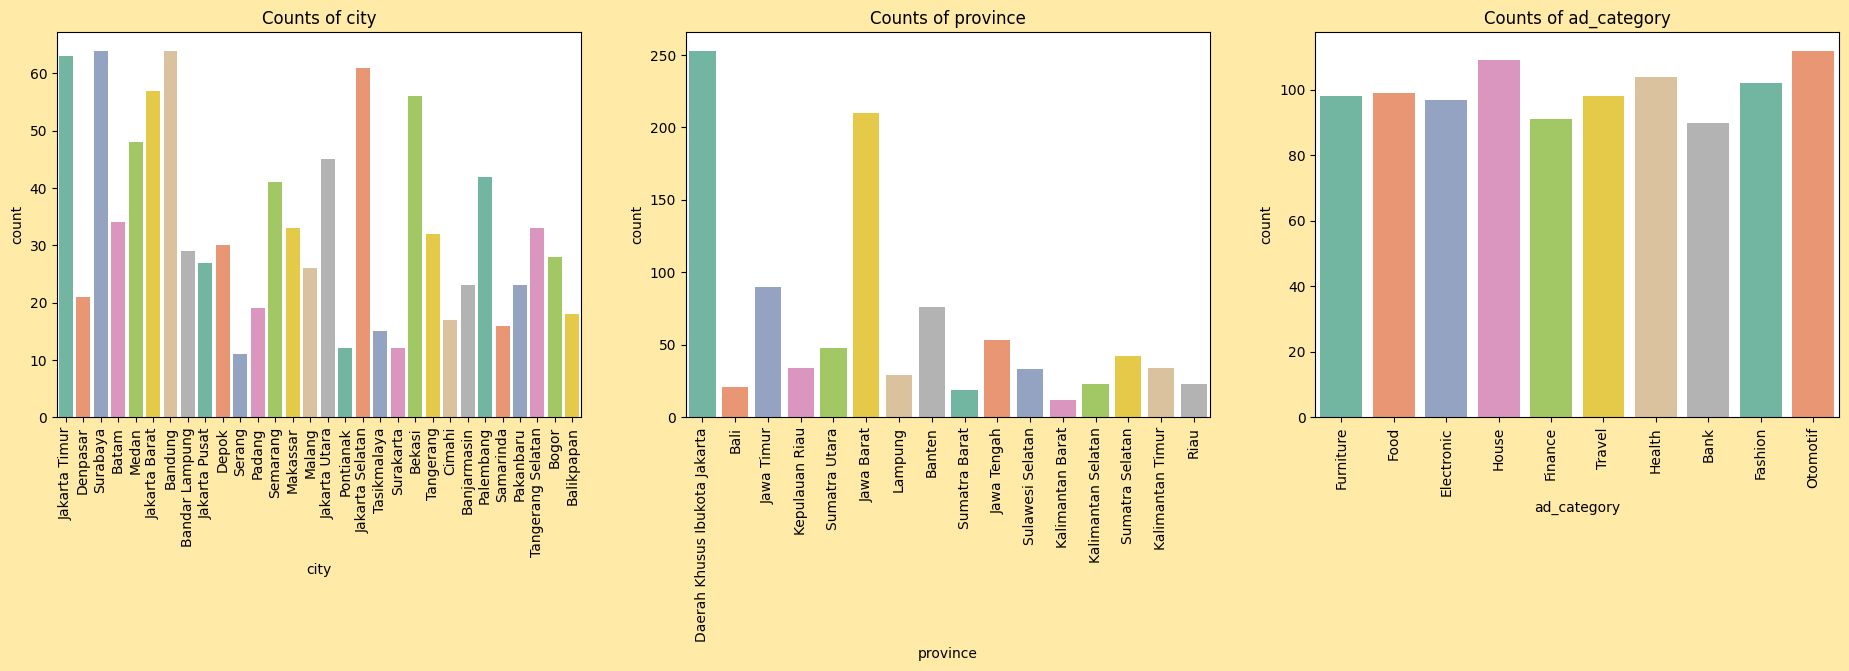

In [8]:
lowvar = dfe[['gender', 'clicked_on_ad', 'age_group']]
highvar = dfe[['city', 'province', 'ad_category']]

fig, ax = plt.subplots(1, 3, figsize=(23, 5))
fig.set_facecolor('#FFEAA7')

for i, subplot in zip(lowvar.columns, ax.flatten()):
    sns.countplot(x=i, data=lowvar, ax=subplot, hue=i, legend=False, palette='Set2', edgecolor='black')
    subplot.set_title(f'Counts of {i}')


fig, ax = plt.subplots(1, 3, figsize=(23, 5))
fig.set_facecolor('#FFEAA7')

for i, subplot in zip(highvar.columns, ax.flatten()):
    sns.countplot(x=i, data=highvar, ax=subplot, hue=i, legend=False, palette='Set2')
    subplot.set_title(f'Counts of {i}')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

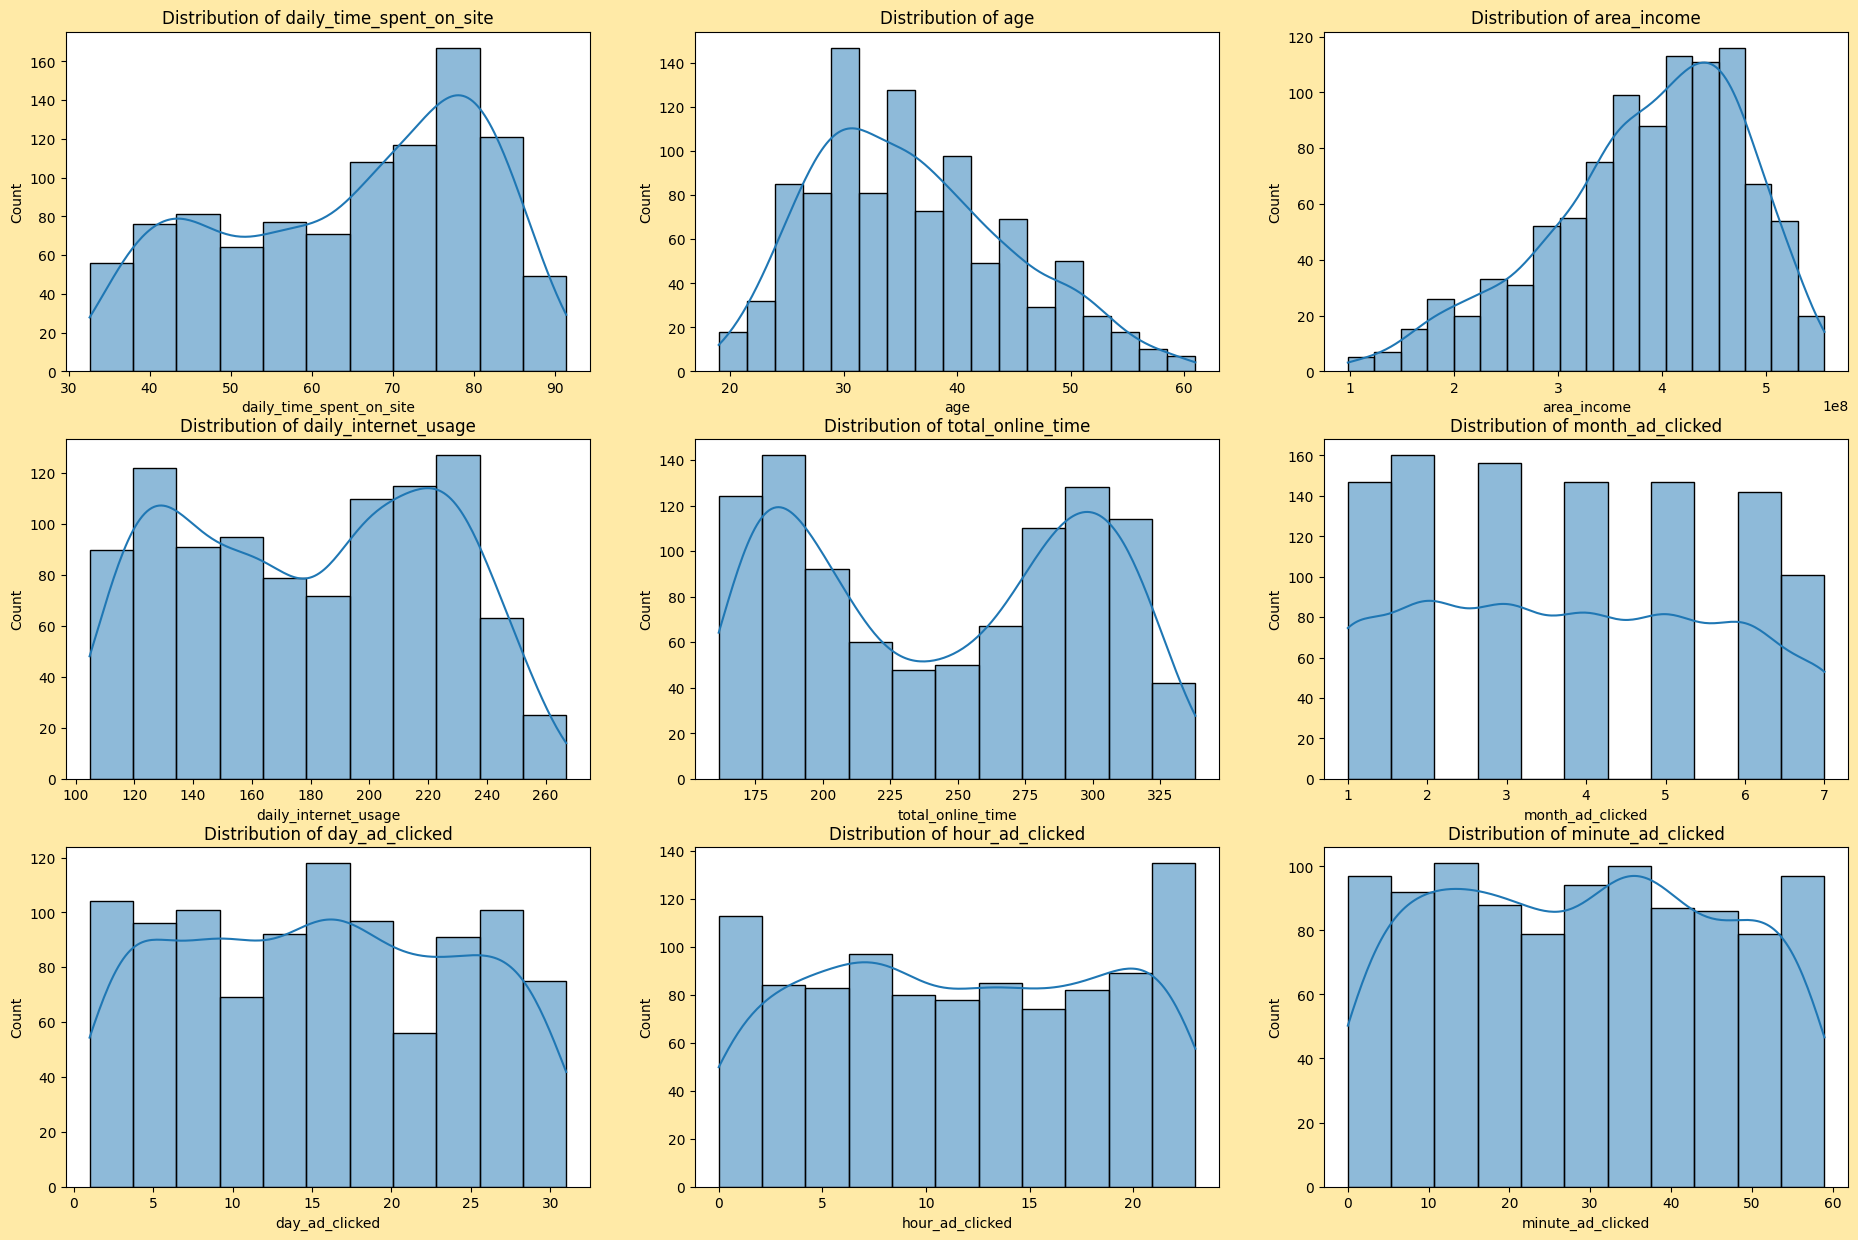

In [10]:
num = dfe[['daily_time_spent_on_site', 'age', 'area_income', 'daily_internet_usage', 'total_online_time', 'month_ad_clicked', 'day_ad_clicked', 'hour_ad_clicked', 'minute_ad_clicked']]
fig, ax = plt.subplots(3, 3, figsize=(23, 15))
fig.set_facecolor('#FFEAA7')

for i, subplot in zip(num.columns, ax.flatten()):
    sns.histplot(x=i, data=num, ax=subplot, kde=True, edgecolor='black')
    subplot.set_title(f'Distribution of {i}')
    

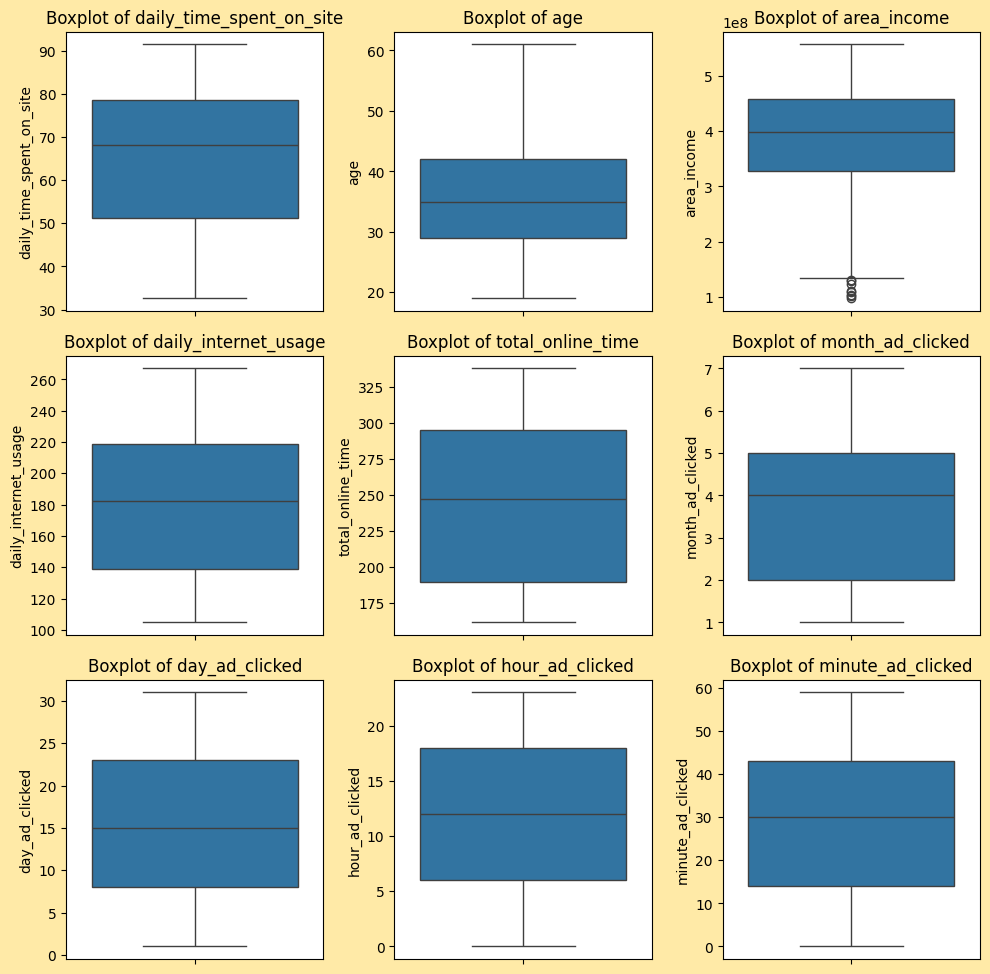

In [11]:
num = dfe[['daily_time_spent_on_site', 'age', 'area_income', 'daily_internet_usage', 'total_online_time', 'month_ad_clicked', 'day_ad_clicked', 'hour_ad_clicked', 'minute_ad_clicked']]
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
fig.set_facecolor('#FFEAA7')

for i, subplot in zip(num.columns, ax.flatten()):
    sns.boxplot(y=i, data=num, ax=subplot)
    subplot.set_title(f'Boxplot of {i}')

fig.tight_layout()

#### Bivariate Analysis

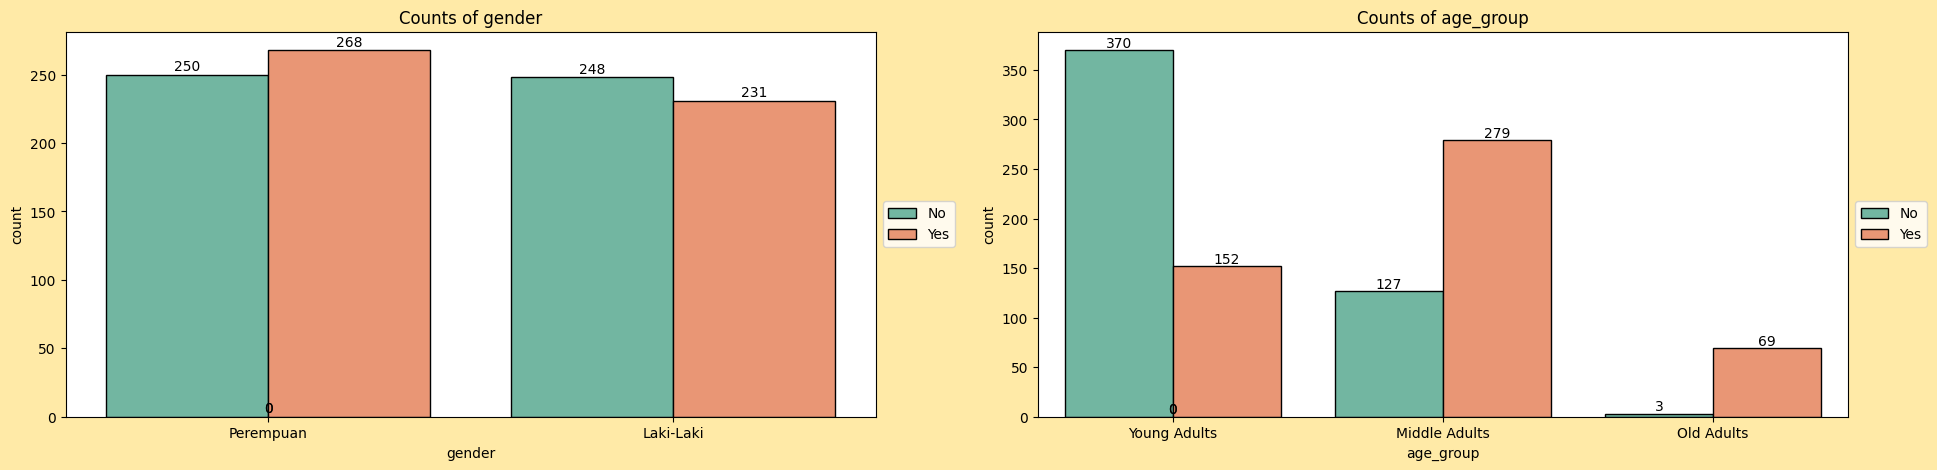

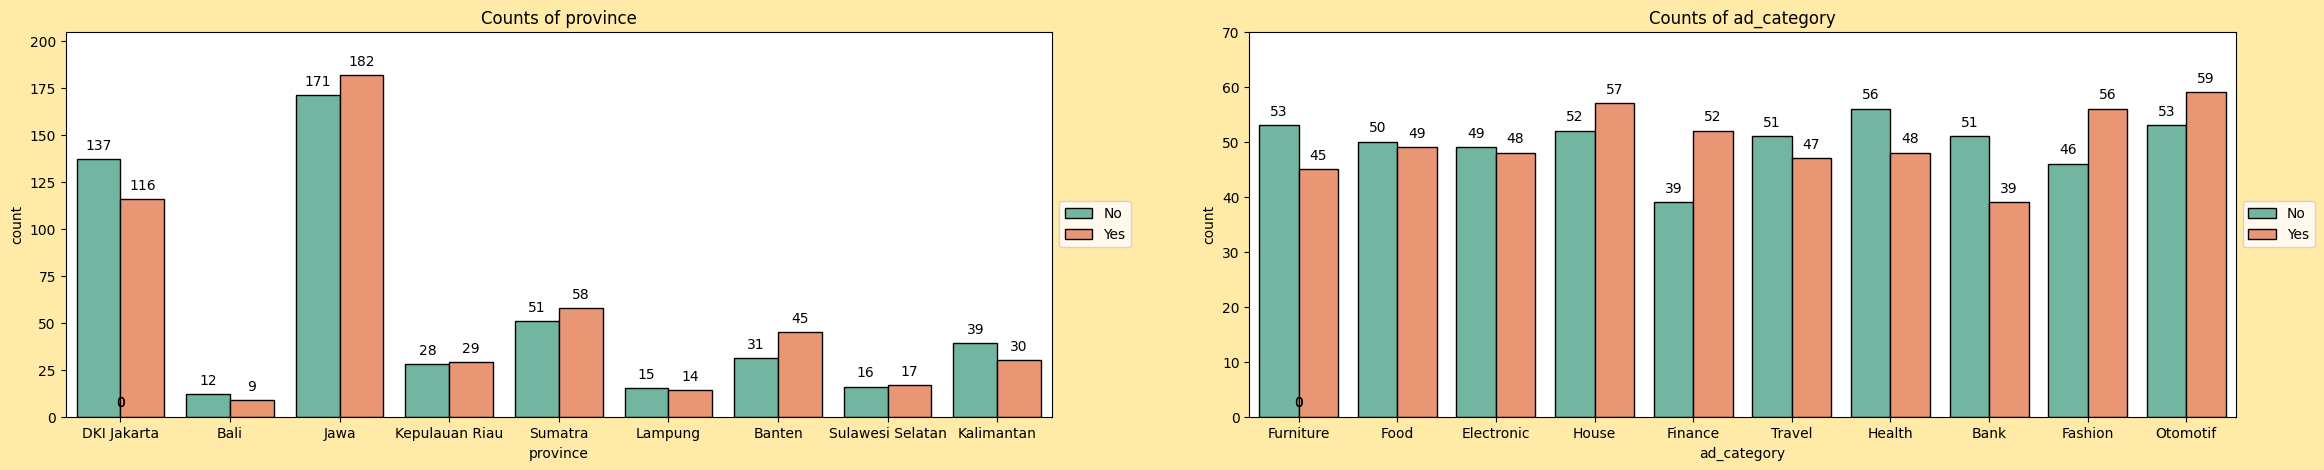

In [94]:
lowvar = dfe[['gender', 'age_group']]
highvar = dfe[['province', 'ad_category']]

fig, ax = plt.subplots(1, 2, figsize=(23, 5))
fig.set_facecolor('#FFEAA7')

for i, subplot in zip(lowvar.columns, ax.flatten()):
    sns.countplot(x=i, data=lowvar, ax=subplot, hue=dfe['clicked_on_ad'], palette='Set2', edgecolor='black')
    subplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    subplot.set_title(f'Counts of {i}')
    for p in subplot.patches:
        height = p.get_height()
        subplot.text(p.get_x()+p.get_width()/2.,
                     height + 3,
                     '{:1.0f}'.format(height),
                     ha="center") 
    

fig, ax = plt.subplots(1, 2, figsize=(28, 5))
fig.set_facecolor('#FFEAA7')

for index, (i, subplot) in enumerate(zip(highvar.columns, ax.flatten())):
    sns.countplot(x=i, data=highvar, ax=subplot, hue=dfe['clicked_on_ad'], palette='Set2', edgecolor='black')
    subplot.set_title(f'Counts of {i}')
    subplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    for label in subplot.get_xticklabels():
        label.set_rotation(0)
    for p in subplot.patches:
        subplot.annotate(format(p.get_height(), '.0f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha = 'center', va = 'center', 
                         xytext = (0, 10), 
                         textcoords = 'offset points')
    if index == 0:
        subplot.set_ylim([0, 205])
    else:
        subplot.set_ylim([0, 70])
    